<a href="https://colab.research.google.com/github/Khushbupatel333/Hotel-Booking-Project/blob/main/Hotel_booking_Analysis_EDA_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -

Hotel Booking Analysis

##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **GitHub Link :-**

https://github.com/Khushbupatel333/Hotel-Booking-Project/blob/main/README.md

# **Problem Statement**


 A hotel system is all about rooms, reservation and cancelletion.A Customer make reservations,change the booking.
   
    
A desk clerk in a hotel at the time of checked out change the checkout date andbcheck out the customer.A room assign to customer at check time and customer bill records are updated.

  A customer can be pay by cash or credit when check out. This all things are part of hotel booking services.The Hotel Booking Dataset can help you to explore and clear all doubts and questions related to hotel booking system.

#### **Define Your Business Objective?**

To analysing data To solve Booking related issues.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import folium

####Loading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks 1/HotelBooking.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

31994

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### What did you know about your dataset?

The given dataset is a dataset of Hotel booking and we have to analysis the data and the insights behind it.

The goal is to understand the issues and problems from customer side and also from perticular hotel or organisation and take step to change it.

The above dataset has 119390 rows and 32 columns.There and some missing values and duplicate values in the dataset

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### Variables Description

Hotel: Name of the hotel(City or Resort)


is_cancelled :Number of cancelled Booking


arrive_year : Year of Customer arrival


arrive _ month:Month of Customer arrival

Adult : Number of Adult


Children :Number of Children


Babies: Number of Babies


meal: Type of meal(HB,FB,BB)


Country: Name of country

is_ repeated_guest: Number of repeated guest


previous_cancellation:Number of Previous cancelled booking


reserved_room_type: Type of room(Ac or normal)

booking_changes: Number of booking chages

deposit_type:Type of deposit(No deposit or refund)

customer_type: Type of customer (Group or transient)

reservation_status:Reservation condition (checked out or cancelled)

Number_of_ booking:Number of booking

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
 print(' Unique values are:',i,'is',df[i].unique())

 Unique values are: hotel is ['Resort Hotel' 'City Hotel']
 Unique values are: is_canceled is [0 1]
 Unique values are: lead_time is [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177

### Null Values Handling

In [13]:
# Write your code to make your dataset analysis ready.
#Removing duplicate values

df.drop_duplicates(inplace=True)
df.duplicated().sum()

#Chekcing null values with percentage
round(df.isna().sum()/len(df)*100,2)

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.52
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.95
company                           93.98


**Children,country,agent variable have null values less than 50% but compony variable have null values more than 50%.**

In [14]:
#Chekcing categories of null values
df.country.value_counts()

df.agent.value_counts()

9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
         ...  
497.0        1
337.0        1
510.0        1
165.0        1
449.0        1
Name: agent, Length: 333, dtype: int64

In [15]:
df.children.value_counts()

df.company.value_counts()

#Dropping variable with more than 50% null values
df.drop(columns='company',inplace=True)

In [16]:
#Replacing null values with most frequent value
df['children']=df['children'].fillna(df['children'].mode()[0])
df['country']=df['country'].fillna(df['country'].mode()[0])
df['agent']=df['agent'].fillna(df['agent'].mode()[0])

df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

**From above children,agent and compony are numerical variable so replace null values with modes.**

###Handling outliers

In [17]:
#Obtaining Categorical features

cat_var=[i for i in df.columns if df[i].dtypes=='O']
print(f'Dataset{len(cat_var)} categorical variables')
print('--'*39)
print(cat_var)

Dataset12 categorical variables
------------------------------------------------------------------------------
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [18]:
#Obtaining numerical variable


num_var=[i for i in df.columns if df[i].dtypes!='O']
print(f'Dataset{len(num_var)} Numericalvariables')
print('--'*39)
print(num_var)

Dataset19 Numericalvariables
------------------------------------------------------------------------------
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [19]:
#Obtaining descrete variables
descrete=[]
for i in num_var:
 if len(df[i].value_counts())<=150:
  descrete.append(i)
  print(i,':',df[i].unique())
  print('__'*39)
 else:
  pass
 print (f'Dataset {len(descrete)} descrete variables')

is_canceled : [0 1]
______________________________________________________________________________
Dataset 1 descrete variables
Dataset 1 descrete variables
arrival_date_year : [2015 2016 2017]
______________________________________________________________________________
Dataset 2 descrete variables
arrival_date_week_number : [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]
______________________________________________________________________________
Dataset 3 descrete variables
arrival_date_day_of_month : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
______________________________________________________________________________
Dataset 4 descrete variables
stays_in_weekend_nights : [ 0  1  2  4  3  6 13  8  5  7 12  9 16 18 19 10 14]
______________________________________________________________________________
Dataset 5 

In [20]:
#Obtaining continuous Variable
continuous=[i for i in num_var if i not in descrete]
print(f'Dataset{len(continuous)} continuous Variable')
print('--'*39)
print(continuous)

Dataset3 continuous Variable
------------------------------------------------------------------------------
['lead_time', 'agent', 'adr']


<ipython-input-21-b0daf5d33943>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[i],fit=norm)


______________________________________________________________________________


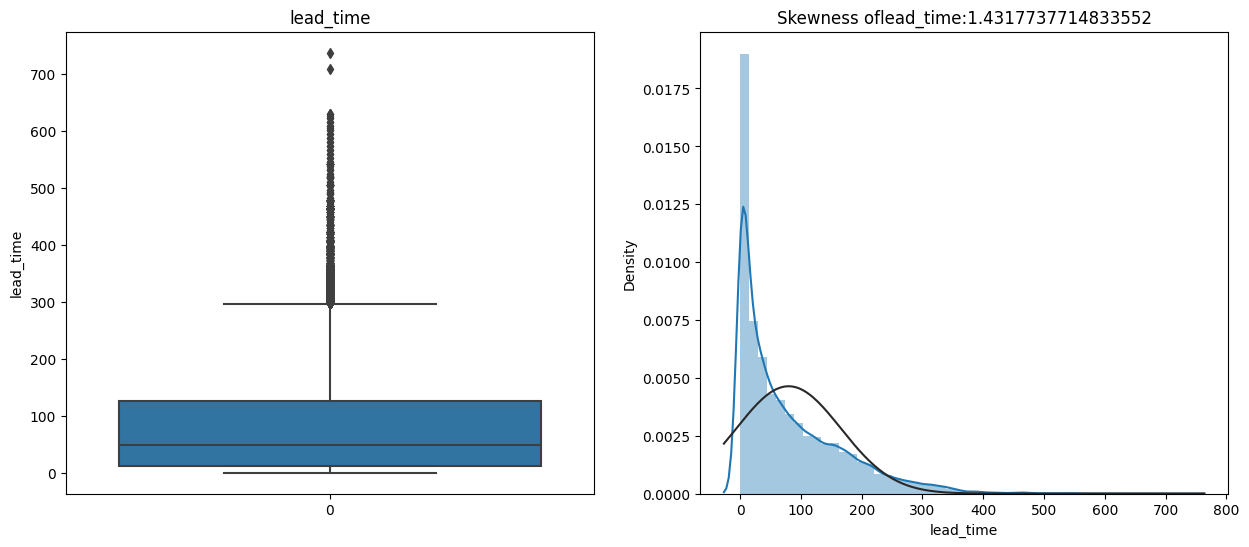

<ipython-input-21-b0daf5d33943>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[i],fit=norm)


______________________________________________________________________________


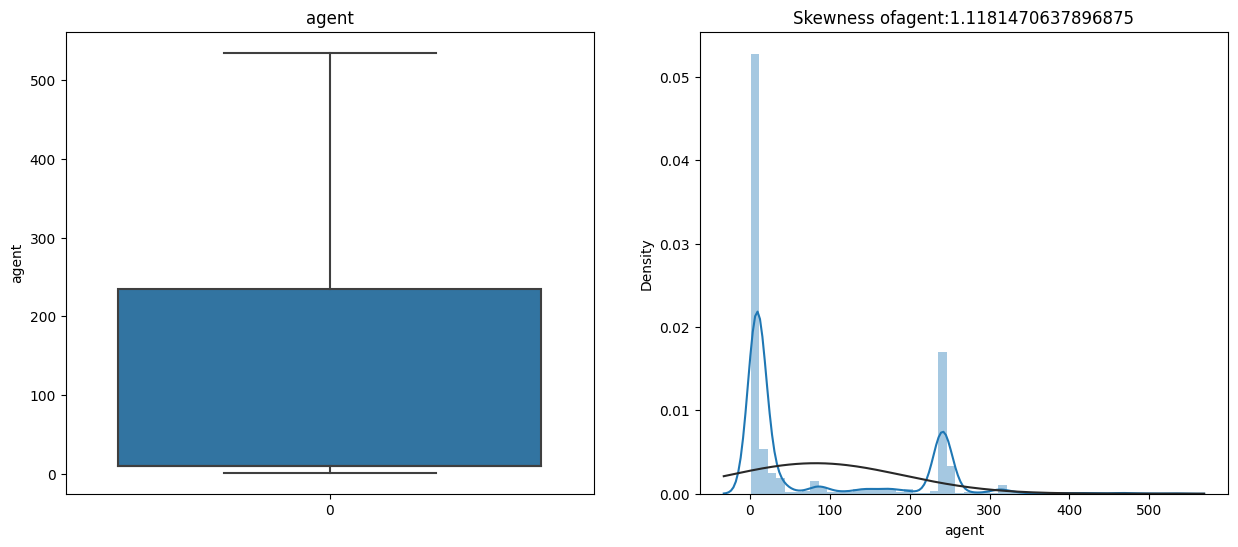

<ipython-input-21-b0daf5d33943>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[i],fit=norm)


______________________________________________________________________________


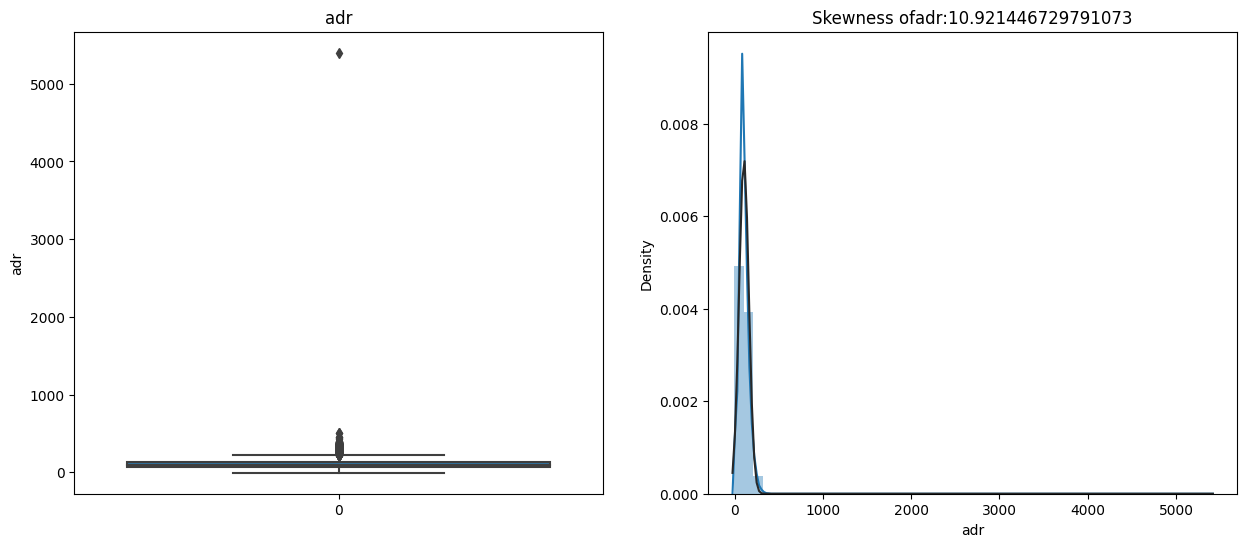

In [21]:
#Checking Outliers for continuous Variable

from scipy.stats import norm
for i in continuous:
 plt.figure(figsize=(15,6))
 plt.subplot(1,2,1)
 ax=sns.boxplot(data=df[i])
 ax.set_title(f'{i}')
 ax.set_ylabel(i)

 plt.subplot(1,2,2)
 ax=sns.distplot(df[i],fit=norm)
 ax.set_title(f'Skewness of{i}:{df[i].skew()}')
 ax.set_xlabel(i)
 print('__'*39)
 plt.show()

**Outliers found in adr and lead_time variables**

In [22]:
#Handling outliers
outliers=['lead_time','adr']

#For loop
for i in outliers:
 Q1=df[i].quantile(0.25)
 Q3=df[i].quantile(0.75)
 IQR=Q3-Q1

 lower=df[i].quantile(0.25)-1.5*IQR
 upper=df[i].quantile(0.75)+1.5*IQR

 #Applying bounds
 df.loc[(df[i]>upper),i]=upper
 df.loc[(df[i]<lower),i]=lower

<ipython-input-23-80d499af0f81>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[i],fit=norm)


____________________________________________________________________________________________________


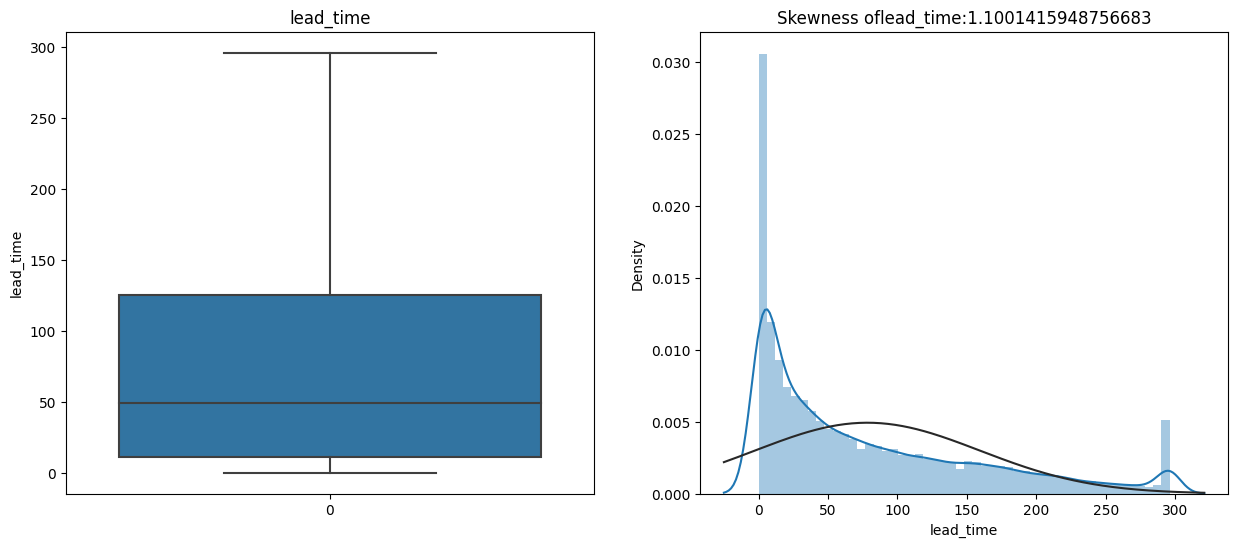

<ipython-input-23-80d499af0f81>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[i],fit=norm)


____________________________________________________________________________________________________


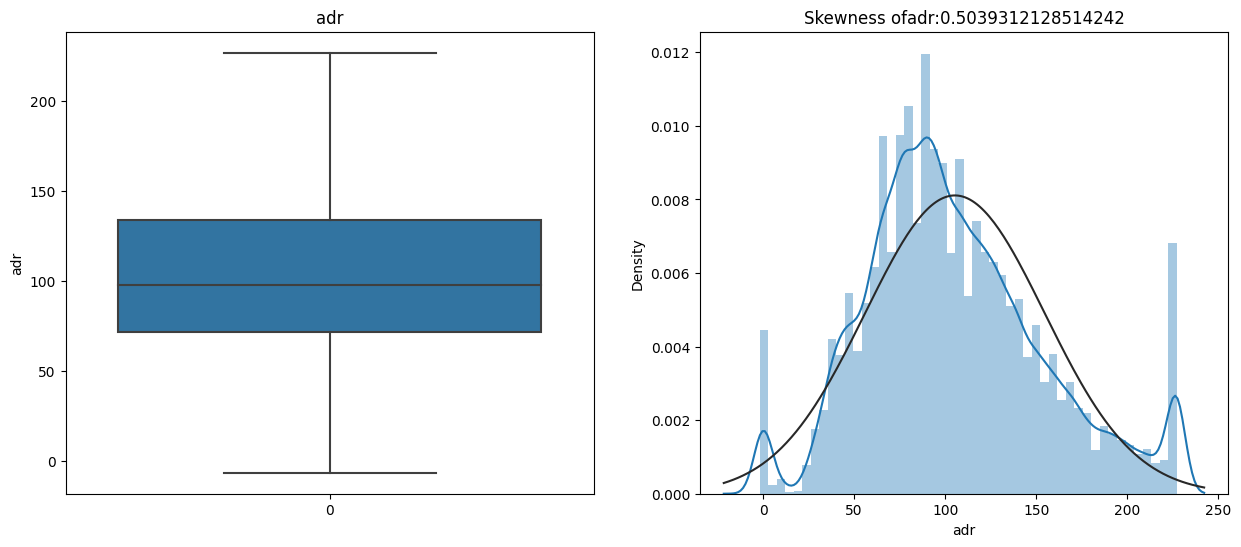

In [23]:

from scipy.stats import norm
for i in outliers:
 plt.figure(figsize=(15,6))
 plt.subplot(1,2,1)
 ax=sns.boxplot(data=df[i])
 ax.set_title(f'{i}')
 ax.set_ylabel(i)

 plt.subplot(1,2,2)
 ax=sns.distplot(df[i],fit=norm)
 ax.set_title(f'Skewness of{i}:{df[i].skew()}')
 ax.set_xlabel(i)
 print('__'*50)
 plt.show()

**Outliers are removed from variables adr and lead_time**

###Data Wrangling and Feature Engineering

In [24]:
df['reserved_room_type']

0         C
1         C
2         A
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: reserved_room_type, Length: 87396, dtype: object

In [25]:
#Change datatype of variables children and agent
df[['children','agent']]=df[['children','agent']].astype('int64')

#Change datatype of reservation_status_date to datetime64
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'],format='%Y-%m-%d')

#checking datatype
df[['reservation_status_date','agent','children']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   reservation_status_date  87396 non-null  datetime64[ns]
 1   agent                    87396 non-null  int64         
 2   children                 87396 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.7 MB


**We change the datatype of children and agent to int type and reservation_status_date to datetime datatype**

In [26]:
#Adding night stays on week night and weekand night in one variable'total_stays'
df['total_stays']=df['stays_in_weekend_nights']+df['stays_in_week_nights']

#Converting adult ,babies and children to total_people
df['total_people']=df['adults']+df['children']+df['babies']

#Creating new variable by children and babies
df['total_children']=df['children']+df['babies']

#Creating new variable which describe same room assign
df['reserved_room_assigned']=np.where(df['reserved_room_type']==df['assigned_room_type'],'yes','no')

#Creating guest_category from total_people variable
df['guest_category']=np.where(df['total_people']==1,'single',np.where(df['total_people']==2,'couple','family'))

#Creating lead_time_category from lead_time
df['lead_time_category']=np.where(df['lead_time']<=15,'low',np.where((df['lead_time']>15)& (df['lead_time']<90),'medium','high'))

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,total_people,total_children,reserved_room_assigned,guest_category,lead_time_category
0,Resort Hotel,0,296,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,0,2,0,yes,couple,high
1,Resort Hotel,0,296,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,0,2,0,yes,couple,high
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,1,1,0,no,single,low
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,1,1,0,yes,single,low
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,2015-07-03,2,2,0,yes,couple,low


In [27]:
#Removed observation having value 0 in total_people
df.drop(df[df['total_people']==0].index,inplace=True)

#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  object        
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  object        
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  int64         
 11  b

In [28]:
#Converting datatype of variables total_people and total_children
df['total_people']=df['total_people'].astype('int64')
df['total_children']=df['total_children'].astype('int64')

#checking type of variables
df[['total_children','total_people']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   total_children  87230 non-null  int64
 1   total_people    87230 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


# **Exploratory Data Analysis**

**Univariate Analysis**

In [29]:
#Obtaiining target variable
excluded_var=[var for var in df.columns if len(df[var].value_counts())>15]
target_var=[var for var in df.columns if var not in excluded_var]

#Defining r to autofit the number of plots
r=int(len(target_var)/3+1)

In [30]:
#Defining function to notate the count of each value
def annot(axes):
 for p in plot.patches:
  total=sum(p.get_height() for p in plot.patches)/100
  percent=round((p.get_height()/total),2)
  x=p.get_x()+p.get_width()/2
  y=p.get_height()
  plot.annotate(f'{percent}%',(x,y),ha='center',va='bottom')

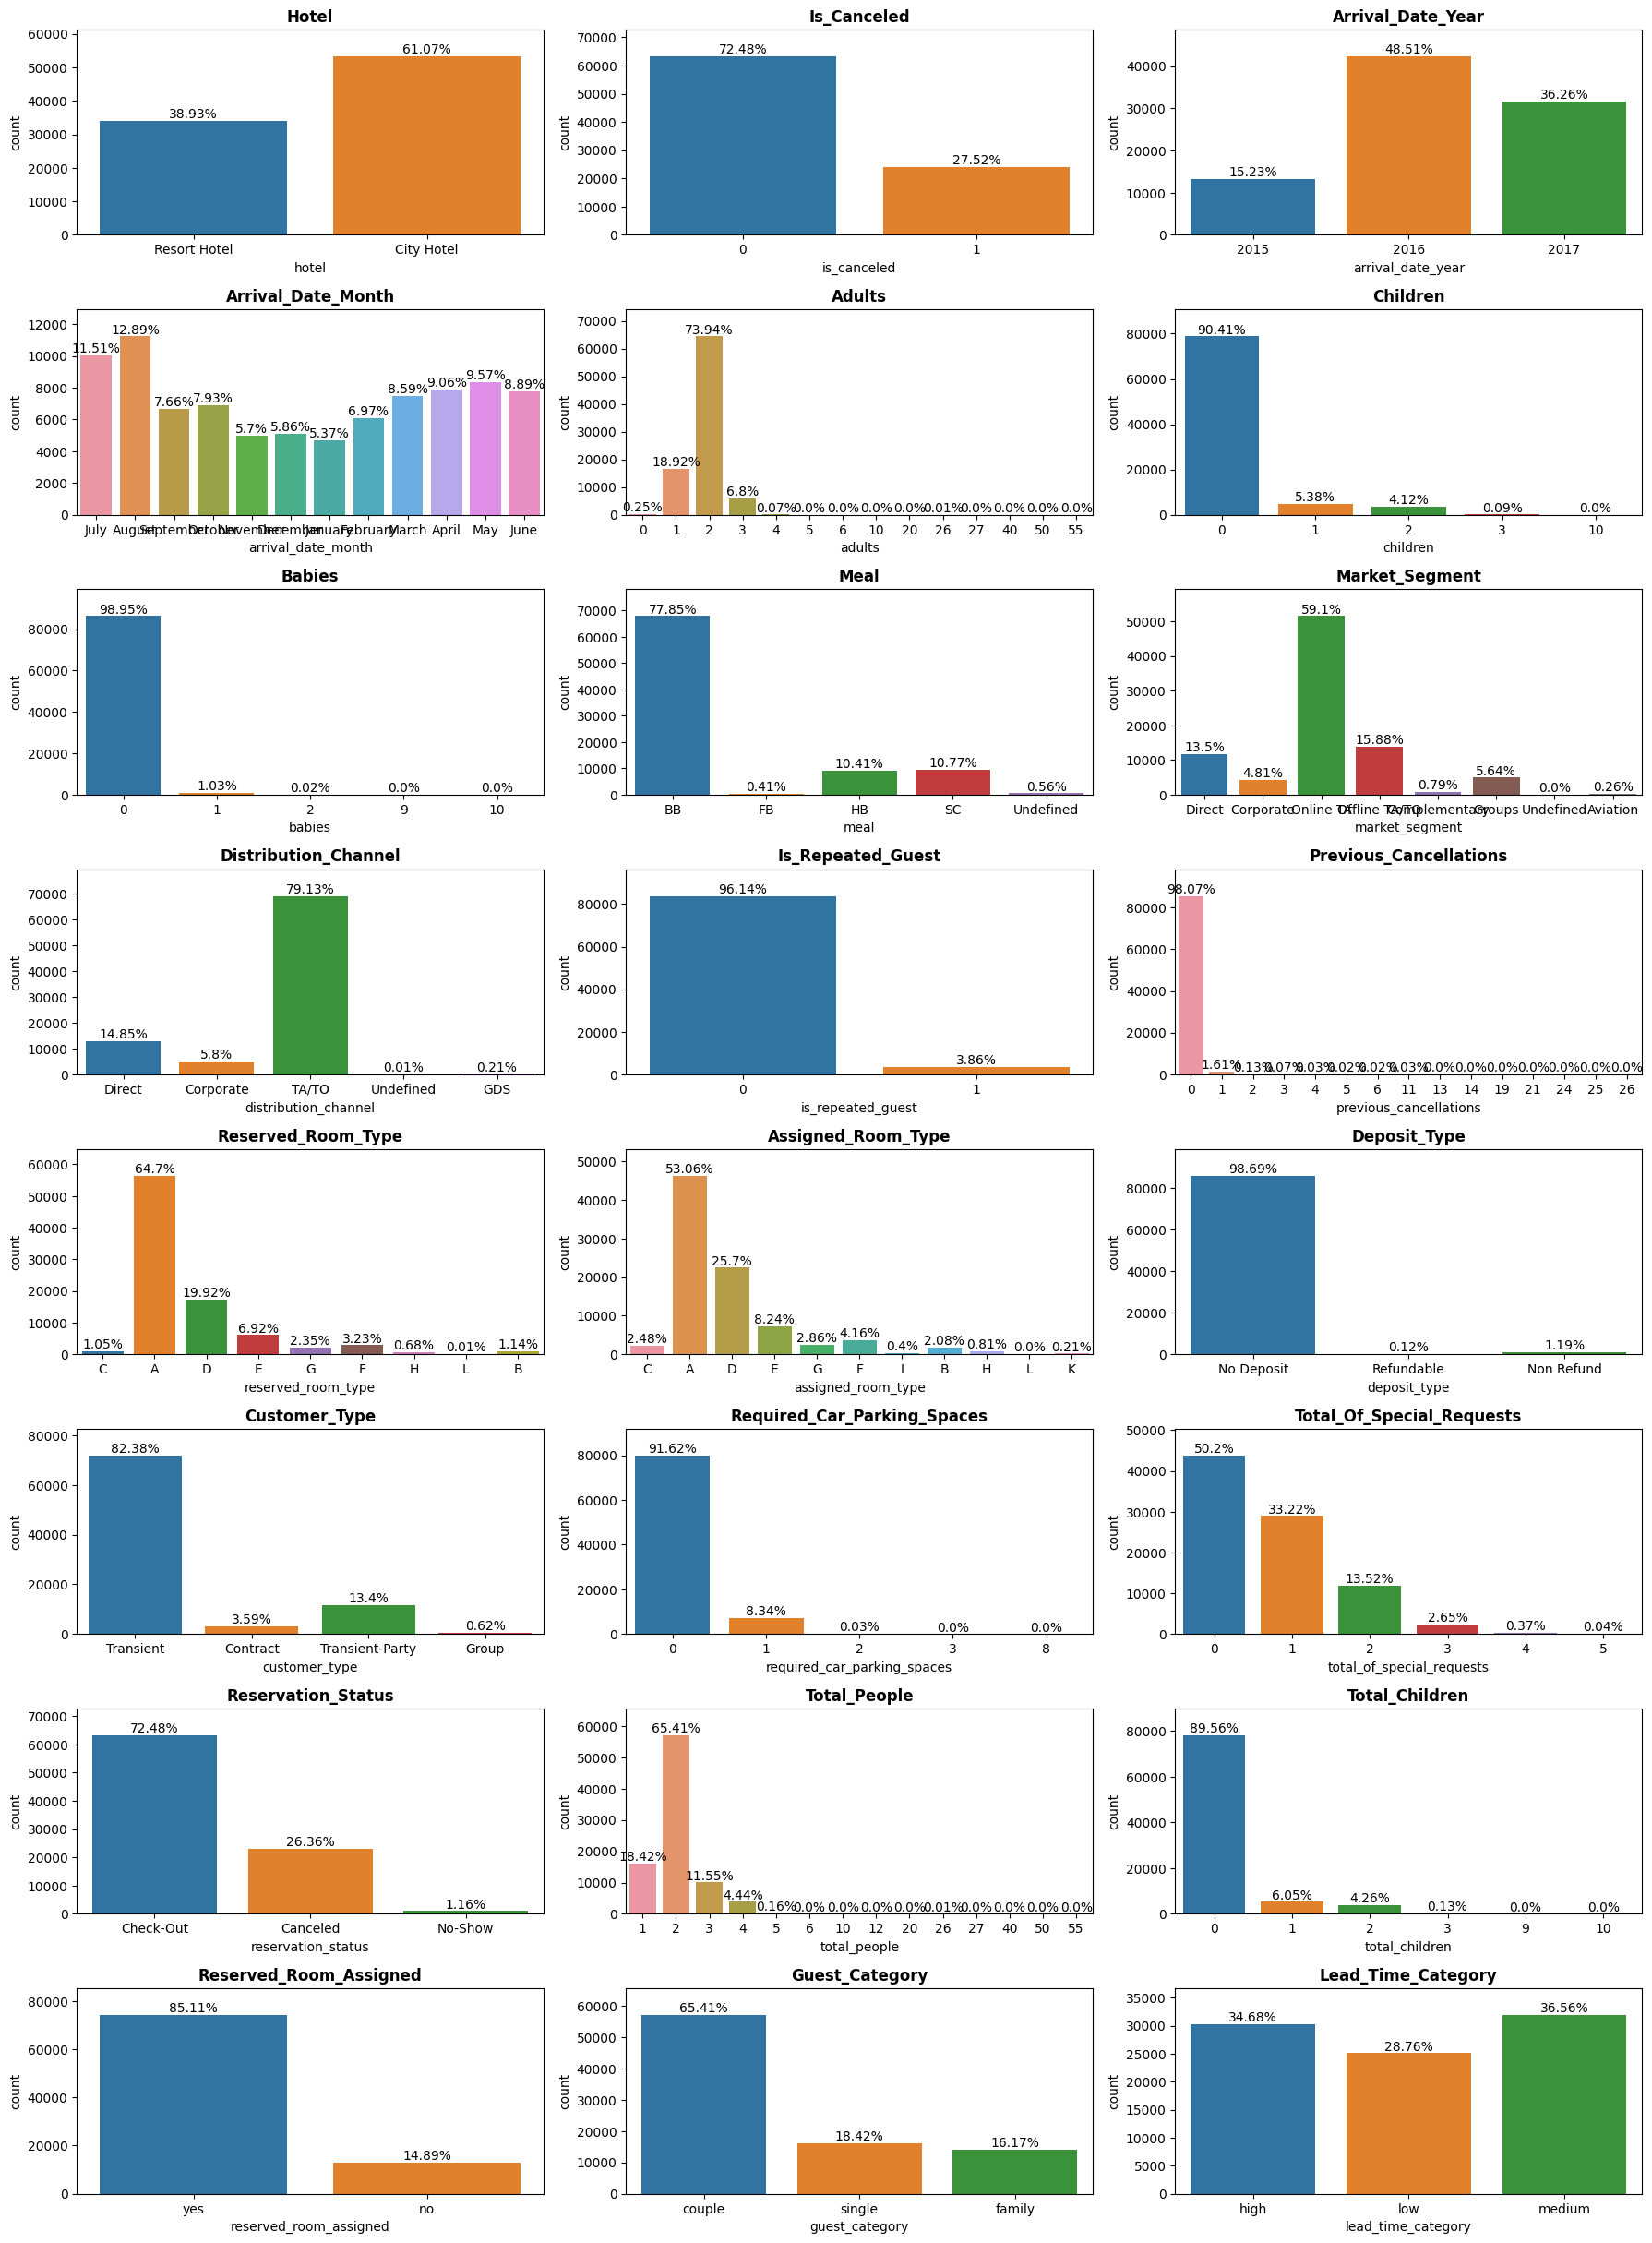

In [31]:
#Plotting countplot for each variable
plt.figure(figsize=(18,r*3))
for n,var in enumerate(target_var):
 plot=plt.subplot(r,3,n+1)
 sns.countplot(x=df[var]).margins(y=0.15)
 plt.title(f'{var.title()}',weight='bold')
 plt.tight_layout()
 annot(plot)

####
- A City hotel is most preferred by 61.07 percent of customers.

- 72.48% bookings are not cancelled.Almost one -third of all reservation are cancelled

- BB is most requested food.

- Most of the bookings are made through the online platform.

- The top distribution channel is TA/TO which is used to amke bookings.

- The majority of hotel bookings are made by new customers.

- The  most customers (80%) preferred to book hotel for a short stay.

- The customers top preference is for Room type A to be reserved.

- 70% chance will be that booking Will not cancelled.

- 90% of people do not require parking spaces for their vehicles.

**Bivariate Analysis**

**Q1. Is not having the reserved room assigned a reason for booking cancellation?**

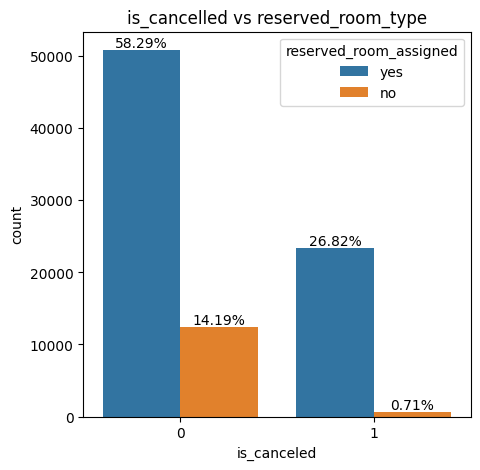

In [32]:
#Countplot for is_cancelled and reserved_room_type
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.countplot(x=df['is_canceled'],hue=df['reserved_room_assigned'])
ax.set_title('is_cancelled vs reserved_room_type')
annot(plot)
plt.show()

**The inability to assign a reserved room to customer is not ground for cancellation.Kess than 1% of customer who cancelled their booking**

**Q2. Is high lead_time is reason for booking cancellation?**

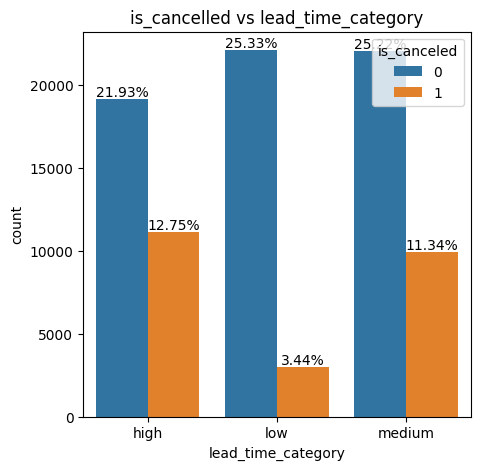

In [33]:
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.countplot(x=df['lead_time_category'],hue=df['is_canceled'])
ax.set_title('is_cancelled vs lead_time_category')
annot(plot)
plt.show()

**Customer who book hotels more than 15 days in advance are more likey to cancel their booking**

**Q3. How many people are Reservation made for?**

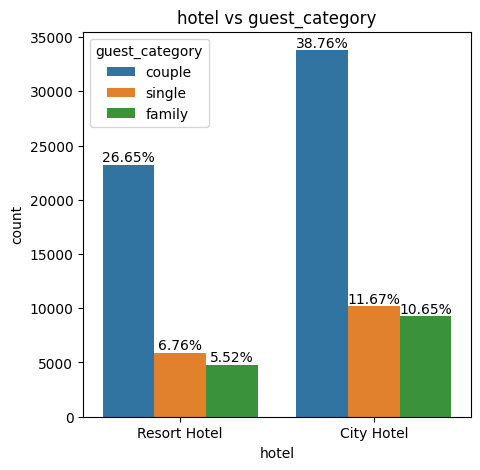

In [34]:
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.countplot(x=df['hotel'],hue=df['guest_category'])
ax.set_title('hotel vs guest_category')
annot(plot)
plt.show()

**Most customers book hotels for two people .A City hotel is preferred when booking for a single person**

**Q4. Which Hotel type has most advance reservation?**

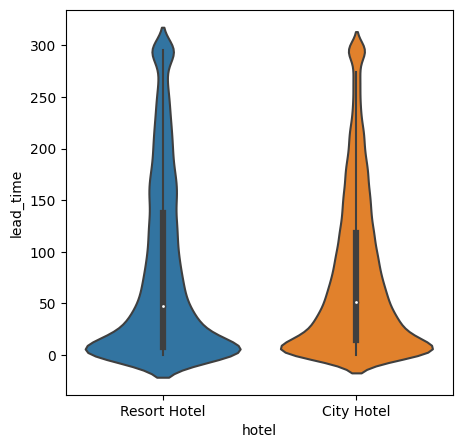

In [35]:
plt.figure(figsize=(5,5))
sns.violinplot(x=df['hotel'],y=df['lead_time'])
ax.set_title('hotel vs lead_time')
plt.show()

**Guests book resorts hotel in advance**

**Q5. Which distribution channel has most cancellation of bookings?**

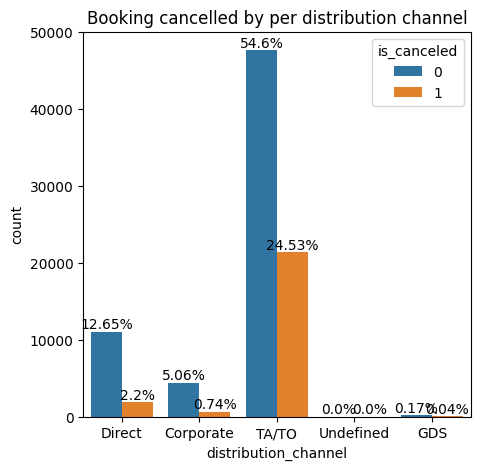

In [36]:
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.countplot(x=df['distribution_channel'],hue=df['is_canceled'])
ax.set_title('Booking cancelled by per distribution channel')
annot(plot)
plt.show()

**The majority of cancelled booking are made through TA/TO .**

**Q6. Which Market segment is used for booking hotel and booking cancelled?**

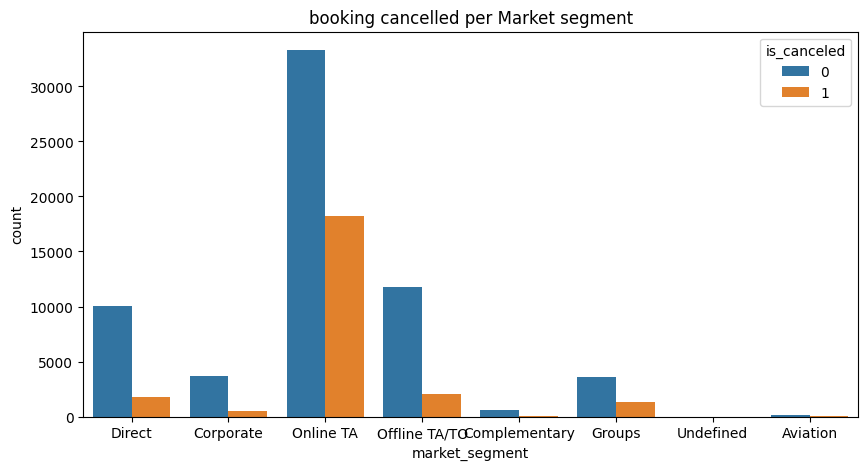

In [37]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['market_segment'],hue=df['is_canceled'])
ax.set_title('booking cancelled per Market segment')
plt.show()

**The most of hotel reservations are made by online as are majority of cancellation of reservation made by customer.**

**Q7. Which room generate a higher ADR?**

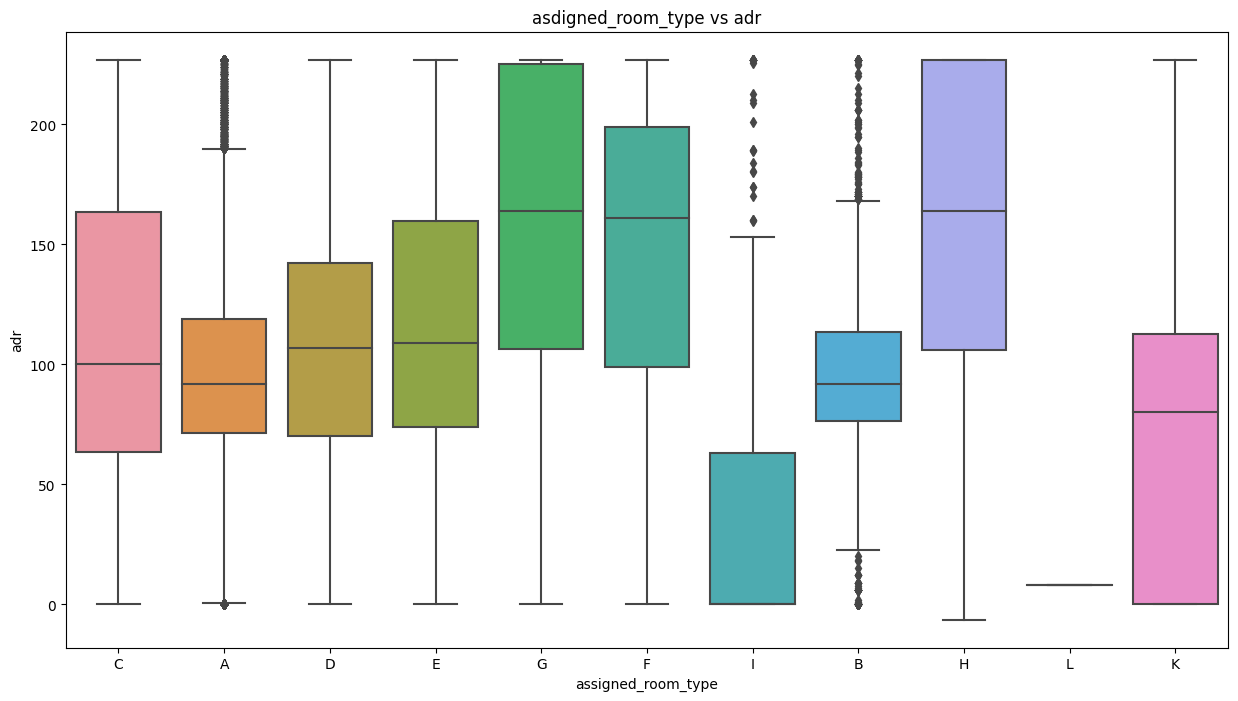

In [38]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(x=df['assigned_room_type'],y=df['adr'])
ax.set_title('asdigned_room_type vs adr')
plt.show()

**Room type G, generate high ADR.Room  I has low ADR.The most popular room is A.But it has lower ADR**

**Q8. Which hotel type is busiest?**

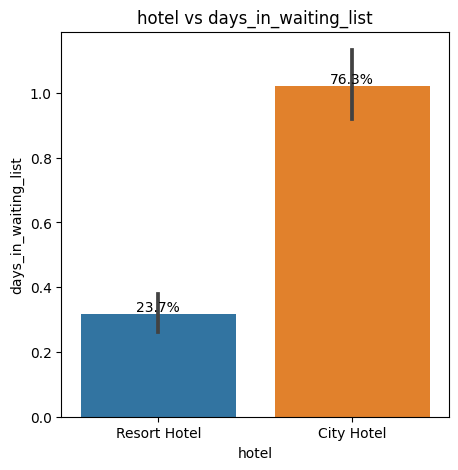

In [39]:
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.barplot(x=df['hotel'],y=df['days_in_waiting_list'])
ax.set_title('hotel vs days_in_waiting_list')
annot(plot)
plt.show()

**City hotel is busier than resort**

**Q9. Which month is busiest for hotels?**

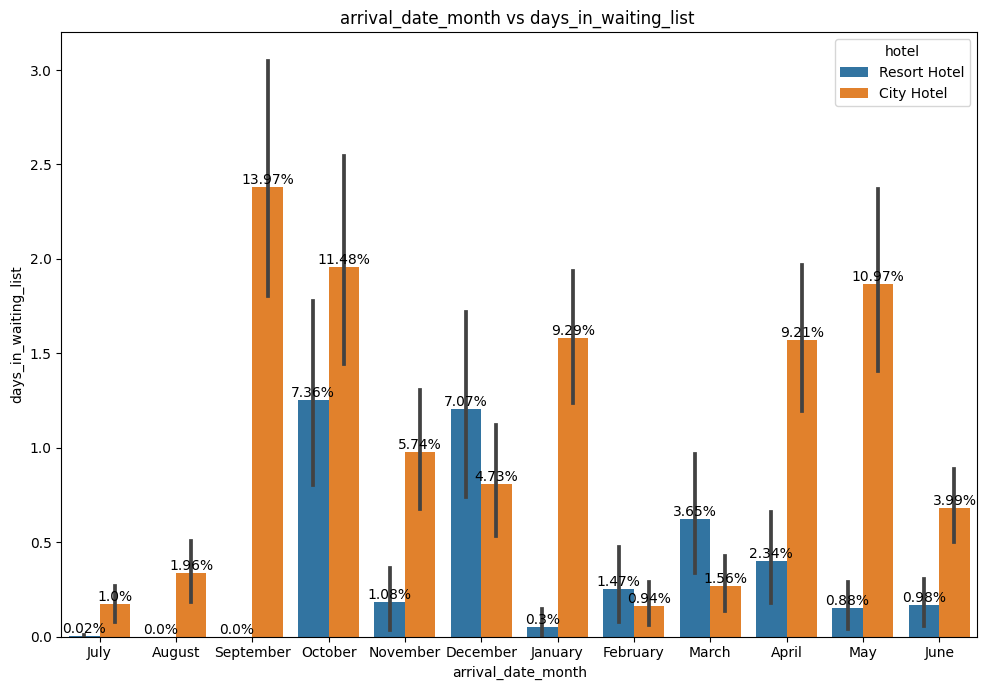

In [40]:
plt.figure(figsize=(10,7))
plot=plt.subplot(111)
ax=sns.barplot(x=df['arrival_date_month'],y=df['days_in_waiting_list'],hue=df['hotel'])
ax.set_title('arrival_date_month vs days_in_waiting_list ')
annot(plot)
plt.tight_layout()
plt.show()

**Customer refer city hotel for new year.The city hotel is busiest in October and september, which means this month has most booking.**

**Q10. Which customer type generate more revenue in terms of hotel type and customer type?**

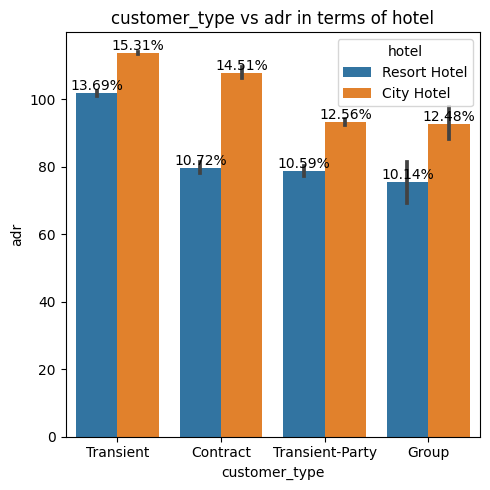

In [41]:
plt.figure(figsize=(5,5))
plot=plt.subplot(1,1,1)
ax=sns.barplot(x=df['customer_type'],y=df['adr'],hue=df['hotel'])
ax.set_title('customer_type vs adr in terms of hotel')
annot(plot)
plt.tight_layout()
plt.show()

**City hotels generate more revenue that resort hotels . Transient customer who book rooms for a short period time genarate more revenue than other type of customer**

**Multivariate analysis**

**1. Correlation Heatmap**

<ipython-input-42-1b4e56d50b79>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmin=-1,cmap='coolwarm',annot=True)


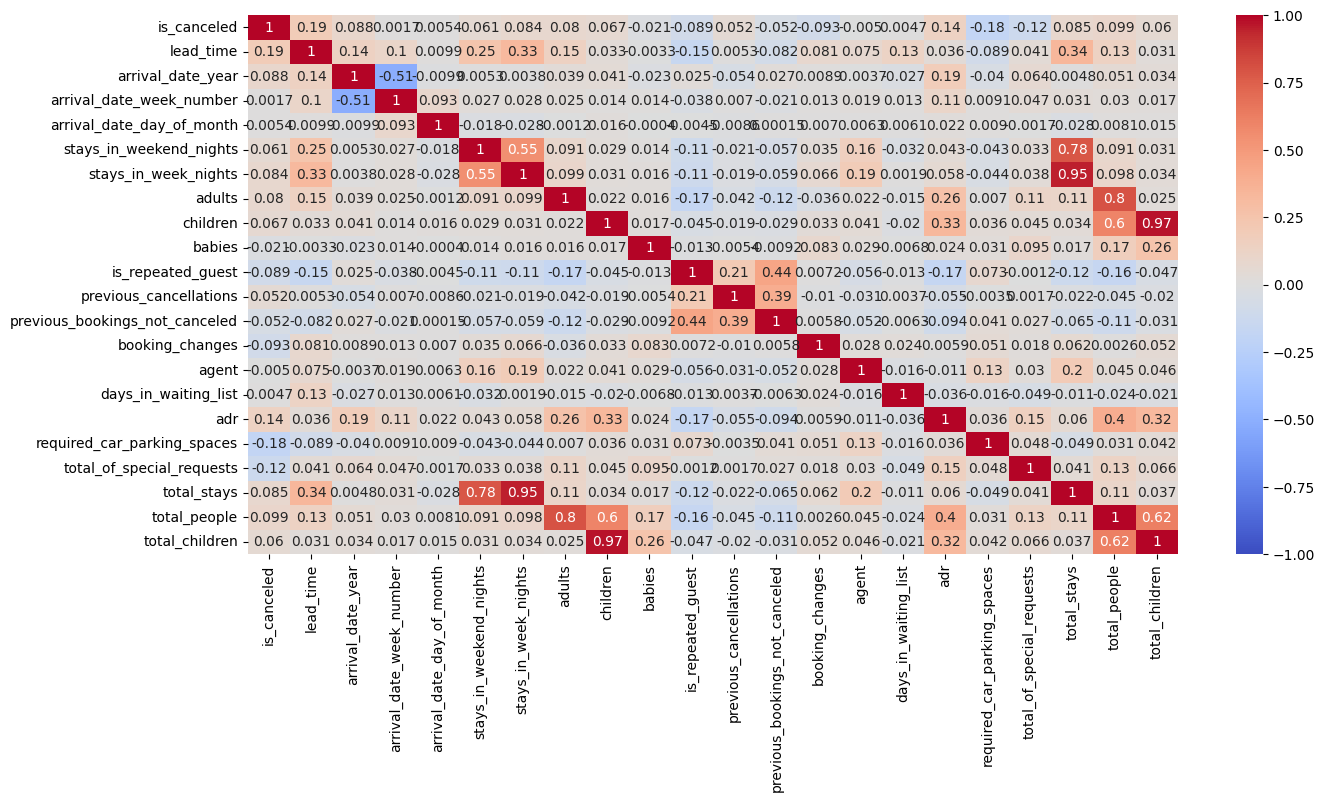

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),vmin=-1,cmap='coolwarm',annot=True)
plt.show()

**In Heatmap we see some high correlation between a few variable beacuse we created new features.**

**The variable lead_time and is_canceled have weak relationship.The most likely reason for cancellation is longer lead_time**

## **5. Solution to Business Objective**

- Be proactive with communication.
- Provide Good services like room service,Food.
- Update your website, social media and prices.
-Increase and improve your review.
- Promote your food and beverage option.
- Create a customer loyality program
- Make attractive and expressive advertisement.
- Use fresh, intresting content to answer the customer question.

- Define a roadmap to new customer.
- Ask for feedback often.

# **Conclusion**

**1. A city hotel has more bookings than the resort.offer package and promote booking  for resort hotel**

**2. BB is most requested food.The hotel should maintain the food quality while offering discounts on other foods to promote other food types.**

**3. Most of bookings are made from online plateform**

**4. Very few customer visited again.so hotel can increase repeat booking  by offering the right repeat booking insentive**

**5. Because rooms A and D are most popular with customer the hotel should maintain their quality.**

**6. Customers do not want to pay pre- deposit for a reservation.Hotels should promote advance deposit because not only does an advance deposit allow you to recognise revenue faster**

**7. People's book rooms for two people.So, encourage family and group booking.**

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***